# Visualizing and animating MTA turnstile data on a map

# learning goals

* show different choices of visualization, and the story-telling aspect
* show the process of data munging, and transformations between datasets
* show how to decipher errors, show all the wart-y steps in working with real data.

Some prerequisites: data types, lists, dictionaries, boolean operators.  Libraries, functions and call signatures.

PyGMT is not part of base anaconda, requires

        conda install --channel conda-forge pygmt

--AaronT, 2022 July 06

In [6]:
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import pygmt

%matplotlib inline

# Load the CSV (comma separated value) data into a Pandas dataframe

In [2]:
df = pd.read_csv("turnstile_220625.txt")

In [3]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,00:00:00,REGULAR,7726949,2716406
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,04:00:00,REGULAR,7726955,2716414
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,08:00:00,REGULAR,7726964,2716438
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,12:00:00,REGULAR,7726999,2716522
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,16:00:00,REGULAR,7727100,2716564
...,...,...,...,...,...,...,...,...,...,...,...
212407,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,05:00:00,REGULAR,0,598
212408,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,09:00:00,REGULAR,0,598
212409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,13:00:00,REGULAR,0,601
212410,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,17:00:00,REGULAR,0,604


# Let's decipher the dataset by looking at one station: 125th St / St. Nicholas, ABCD lines.

In [4]:
#sel = (df['STATION']=='125 ST') & df['LINENAME']=='ACBD')
sel = ((df['STATION']=='125 ST') & (df['LINENAME']=='ACBD'))

In [5]:
df[sel]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
49014,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,00:00:00,REGULAR,505329,578064
49015,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,04:00:00,REGULAR,505341,578133
49016,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,08:00:00,REGULAR,505383,578174
49017,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,12:00:00,REGULAR,505475,578265
49018,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,16:00:00,REGULAR,505581,578413
...,...,...,...,...,...,...,...,...,...,...,...
49681,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,04:00:00,REGULAR,327680,681
49682,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,08:00:00,REGULAR,327680,683
49683,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,12:00:00,REGULAR,327680,686
49684,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,16:00:00,REGULAR,327680,686


In [6]:
dt = df['DATE'] + " " + df['TIME']
dt = pd.to_datetime(dt)

In [7]:
dt[0]

Timestamp('2022-06-18 00:00:00')

## Let's try plotting the turnstile entry data over time.

It looks like junk!  Why?  Hint: there's a lot of repeated timestamps, and it turns out to correspond to different turnstiles in the same station.

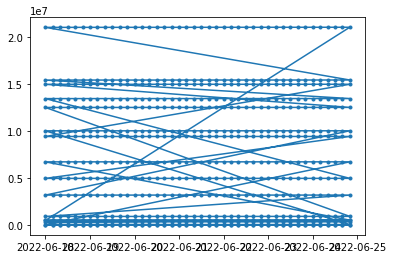

In [8]:
plt.plot(
    dt[sel], df['ENTRIES'][sel], '.-'
)
plt.show()

In [9]:
np.diff( dt[sel] ) / 1e9 / 3600

array([   4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4, -164,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4, -164,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4, -164,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,   

In [10]:
df[sel]['SCP'].unique()

array(['01-00-00', '01-00-01', '01-00-02', '01-00-03', '01-00-04',
       '01-06-00', '00-00-00', '00-00-01', '00-00-02', '00-00-03',
       '00-00-04', '00-00-05', '00-00-06', '00-00-07', '00-05-00',
       '00-05-01'], dtype=object)

## Let's further specialize by looking at only one turnstile

In [11]:
sel2 = sel & (df['SCP'] == '01-00-00')

In [12]:
df[sel2]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
49014,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,00:00:00,REGULAR,505329,578064
49015,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,04:00:00,REGULAR,505341,578133
49016,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,08:00:00,REGULAR,505383,578174
49017,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,12:00:00,REGULAR,505475,578265
49018,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,16:00:00,REGULAR,505581,578413
49019,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,20:00:00,REGULAR,505673,578662
49020,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,00:00:00,REGULAR,505708,578832
49021,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,04:00:00,REGULAR,505718,578888
49022,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,08:00:00,REGULAR,505753,578914
49023,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,12:00:00,REGULAR,505821,579006


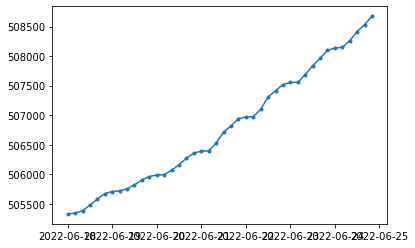

In [13]:
plt.plot(
    dt[sel2], df['ENTRIES'][sel2], '.-'
)
plt.show()

In [14]:
plt.plot(
    dt[sel2], df['EXITS'][sel2], '.-'
)
plt.show()

KeyError: 'EXITS'

In [ ]:
df.keys()

In [15]:
df['EXITS                                                               ']

0         2716406
1         2716414
2         2716438
3         2716522
4         2716564
           ...   
212407        598
212408        598
212409        601
212410        604
212411        604
Name: EXITS                                                               , Length: 212412, dtype: int64

In [16]:
df = df.rename(columns={'EXITS                                                               ': "EXITS"})

In [17]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

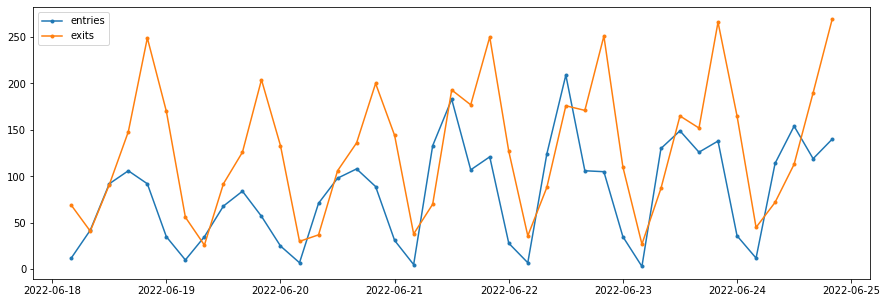

In [94]:
plt.figure(figsize=(15,5))
plt.plot(
    dt[sel2][1:], np.diff( df['ENTRIES'][sel2] ), '.-', label='entries'
)
plt.plot(
    dt[sel2][1:], np.diff( df['EXITS'][sel2] ), '.-', label='exits'
)
plt.legend()
plt.show()

## Immediate next steps

Method to fix up CSV-read keys

Method to condense all turnstile data together, given a station name

Method to find for a given turnstile, any data that is NOT monotonic.


C/A = control area
UNIT = ???
SCP = turnstile identifier
DESC = ???    (out of 212412 entries, 211437 regular and 975 "recovr aud"

In [22]:
asdf = df['DESC'] == 'RECOVR AUD'

In [23]:
df[asdf]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
511,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/19/2022,06:00:00,RECOVR AUD,4723019,8200071
512,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/19/2022,10:00:00,RECOVR AUD,4723038,8200189
513,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/19/2022,14:00:00,RECOVR AUD,4723089,8200514
514,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/19/2022,18:00:00,RECOVR AUD,4723229,8200874
515,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/19/2022,22:00:00,RECOVR AUD,4723373,8200979
...,...,...,...,...,...,...,...,...,...,...,...
211848,S102,R165,00-03-01,TOMPKINSVILLE,1,SRT,06/23/2022,02:00:00,RECOVR AUD,76673,2
211849,S102,R165,00-03-01,TOMPKINSVILLE,1,SRT,06/23/2022,06:00:00,RECOVR AUD,76673,2
211850,S102,R165,00-03-01,TOMPKINSVILLE,1,SRT,06/23/2022,10:00:00,RECOVR AUD,76680,2
211854,S102,R165,00-03-01,TOMPKINSVILLE,1,SRT,06/24/2022,02:00:00,RECOVR AUD,46,0


In [20]:
df['DESC'].unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

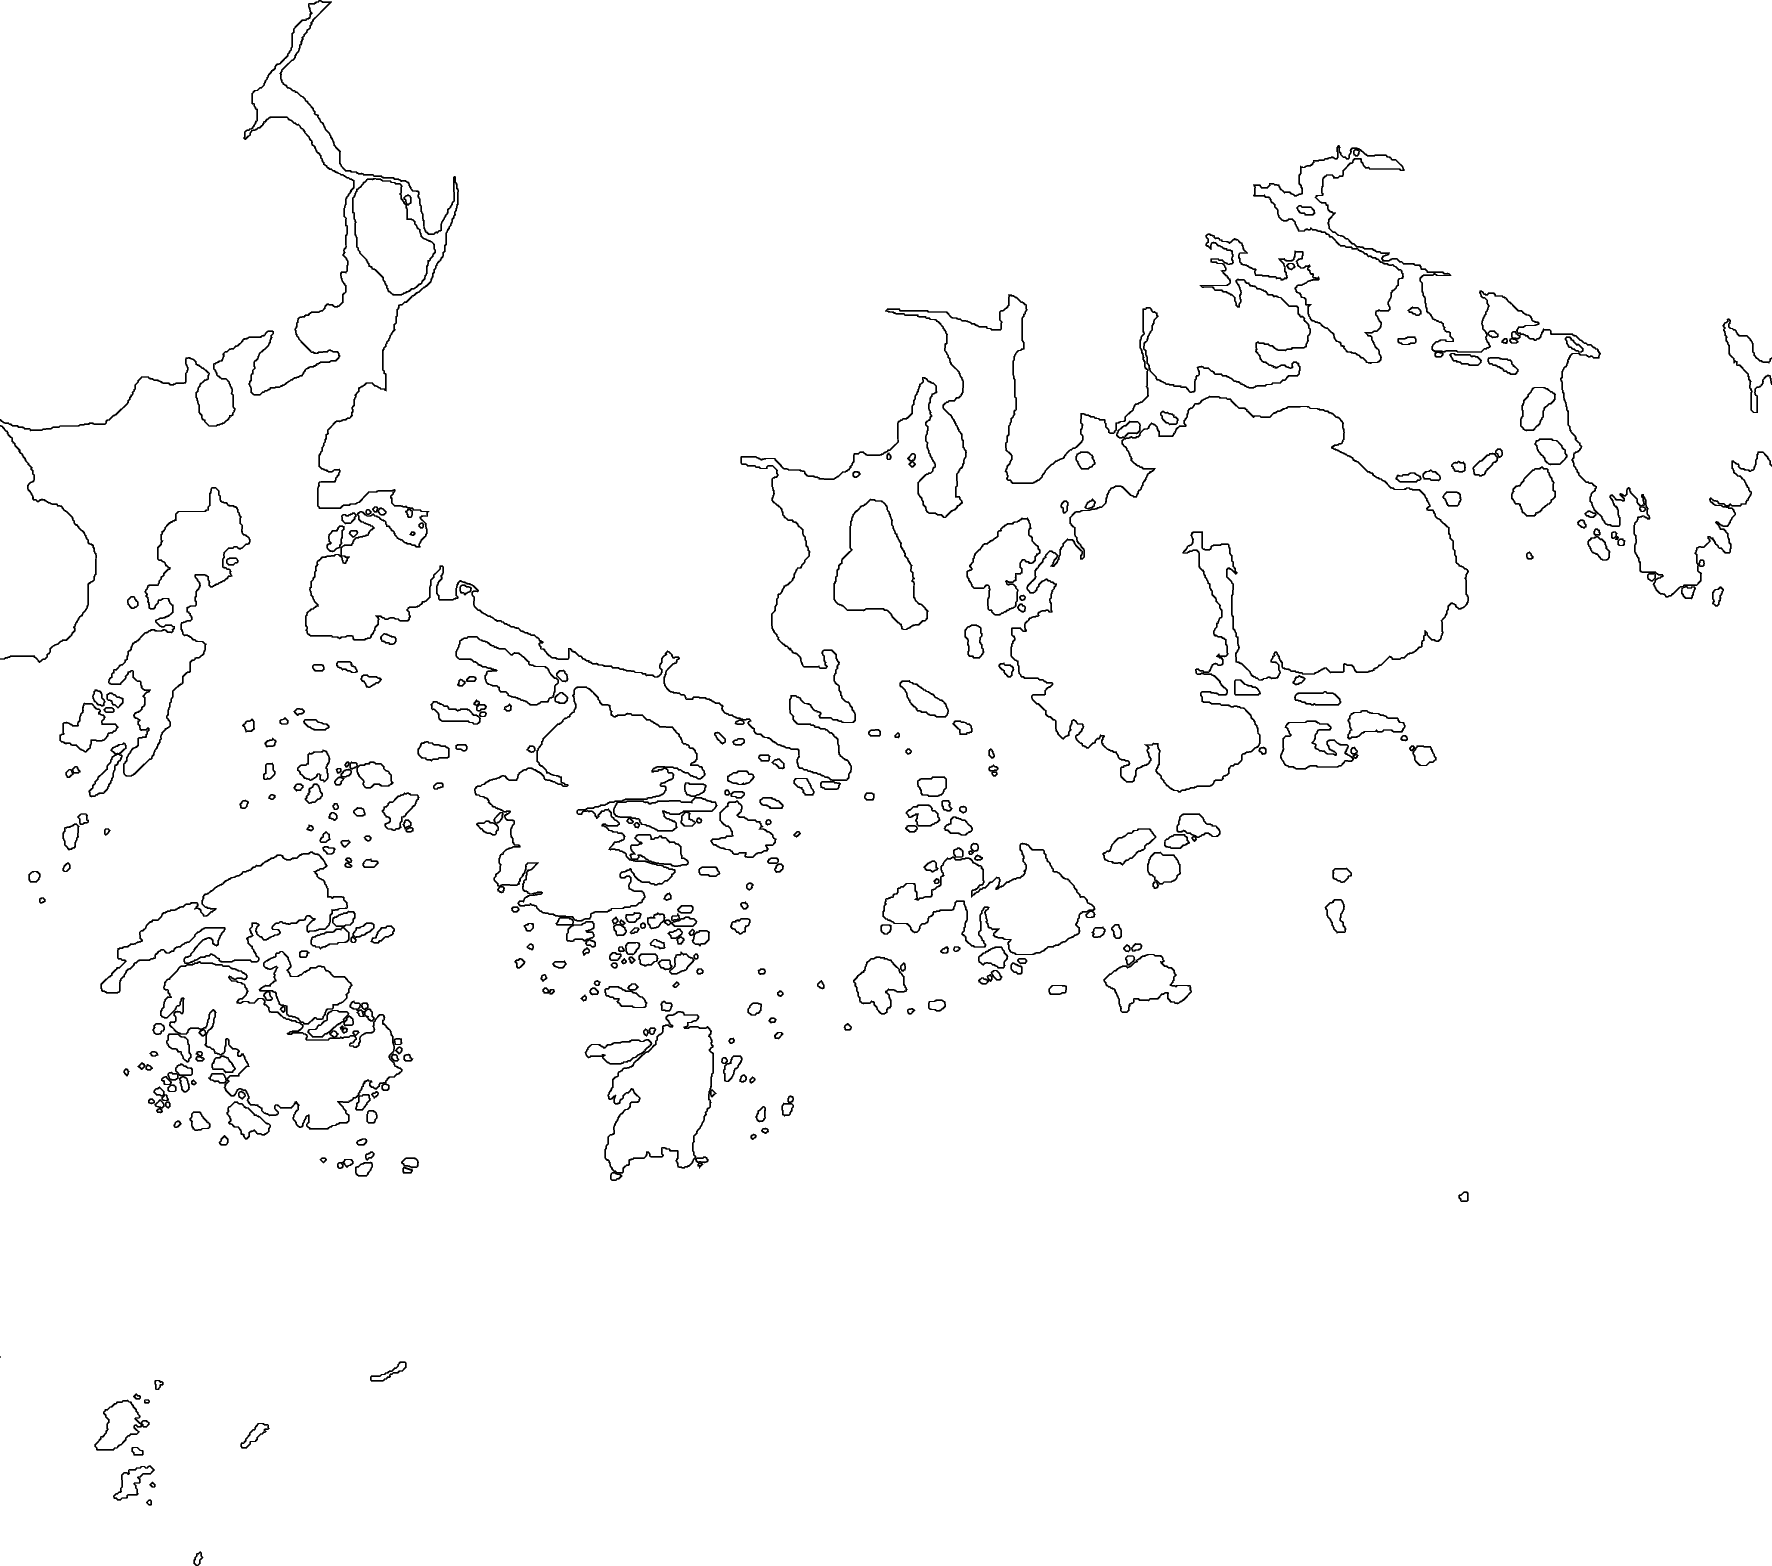

In [2]:
fig = pygmt.Figure()
fig.coast(region=[-69, -68, 43.75, 44.75], shorelines=True)
fig.show()